<a href="https://colab.research.google.com/github/Jinwook-Song/audio_processing/blob/main/colab/%EC%98%A4%EB%94%94%EC%98%A4_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Non-Feature: 오디오 분류*
---


# 데이터 준비 및 전처리




In [ ]:
import numpy as np
import itertools
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [ ]:
!wget https://www.dropbox.com/s/3dsnj5ldtf3dcx4/GeneralMidi.wav

--2022-03-14 06:46:55--  https://www.dropbox.com/s/3dsnj5ldtf3dcx4/GeneralMidi.wav
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3dsnj5ldtf3dcx4/GeneralMidi.wav [following]
--2022-03-14 06:46:55--  https://www.dropbox.com/s/raw/3dsnj5ldtf3dcx4/GeneralMidi.wav
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca202ad25eb57eb162f3882d9c7.dl.dropboxusercontent.com/cd/0/inline/Bhbu_NJNr2gxQ6ZmxkmI7oaUw1LWRnOvgv20aJCRzIcU6EYIeP2ZzPjpneS_k-8mo1tWrEk8LSNf6qJMyfbEx-bJhFm4FseRDCQwZO8RxuyN_zltu3KLRTtn5EtjGxKbAHMos3ar2FXM3TDgpxKpUxUGuH65Rg0D_BiXo-y-9x7bFA/file# [following]
--2022-03-14 06:46:55--  https://uca202ad25eb57eb162f3882d9c7.dl.dropboxusercontent.com/cd/0/inline/Bhbu_NJNr2gxQ6ZmxkmI7oaUw1LWRnOvgv20aJCRzIcU6EYIeP2ZzPjpneS

In [ ]:
midi_file = './GeneralMidi.wav'



*   wmv 파일에는 128개 악기와 46개 타악기의 음 50개씩 2초 간격으로 존재
*   해당 예제에서는 일부 악기만 선택해서 사용



In [ ]:
instruments = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
num_notes = 50
sec = 2

audio = []
inst = []
for inst_idx, note in itertools.product(range(len(instruments)), range(num_notes)):
  instrument = instruments[inst_idx]
  offset = (instrument*num_notes*sec) + (note*sec)
  print('instrument: {}, note: {}, offset: {}'.format(instrument, note, offset))
  y, sr = librosa.load(midi_file, sr=None, offset=offset, duration=2.0)
  audio.append(y)
  inst.append(inst_idx)

instrument: 0, note: 0, offset: 0
instrument: 0, note: 1, offset: 2
instrument: 0, note: 2, offset: 4
instrument: 0, note: 3, offset: 6
instrument: 0, note: 4, offset: 8
instrument: 0, note: 5, offset: 10
instrument: 0, note: 6, offset: 12
instrument: 0, note: 7, offset: 14
instrument: 0, note: 8, offset: 16
instrument: 0, note: 9, offset: 18
instrument: 0, note: 10, offset: 20
instrument: 0, note: 11, offset: 22
instrument: 0, note: 12, offset: 24
instrument: 0, note: 13, offset: 26
instrument: 0, note: 14, offset: 28
instrument: 0, note: 15, offset: 30
instrument: 0, note: 16, offset: 32
instrument: 0, note: 17, offset: 34
instrument: 0, note: 18, offset: 36
instrument: 0, note: 19, offset: 38
instrument: 0, note: 20, offset: 40
instrument: 0, note: 21, offset: 42
instrument: 0, note: 22, offset: 44
instrument: 0, note: 23, offset: 46
instrument: 0, note: 24, offset: 48
instrument: 0, note: 25, offset: 50
instrument: 0, note: 26, offset: 52
instrument: 0, note: 27, offset: 54
instrum

In [ ]:
import numpy as np

audio_np = np.array(audio, np.float32)
inst_np = np.array(inst, np.int16)

print(audio_np.shape, inst_np.shape)

(500, 88200) (500,)


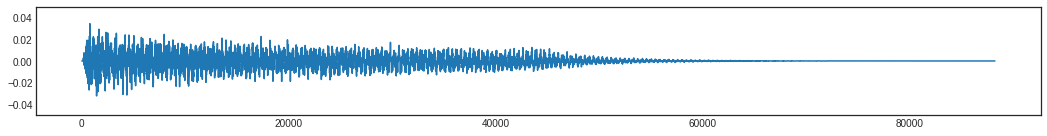

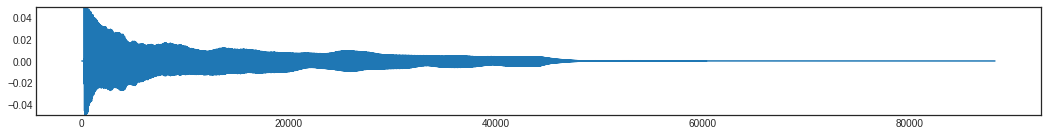

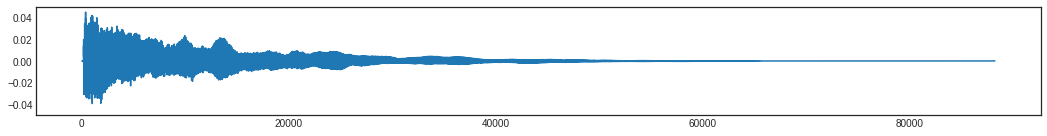

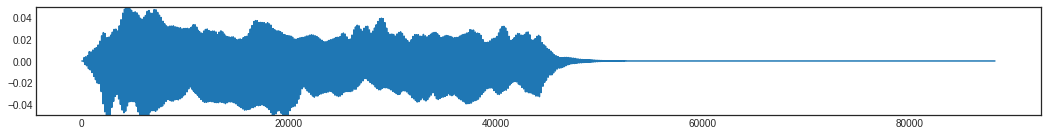

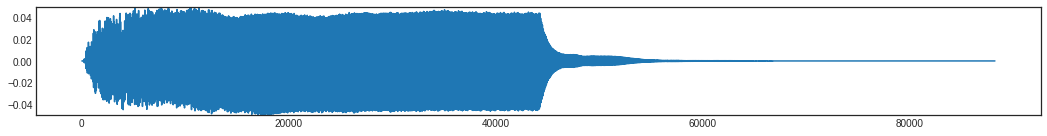

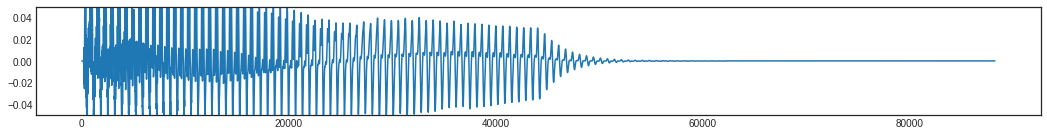

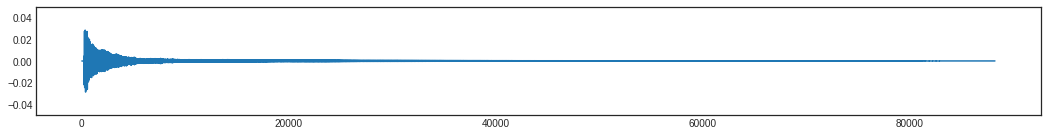

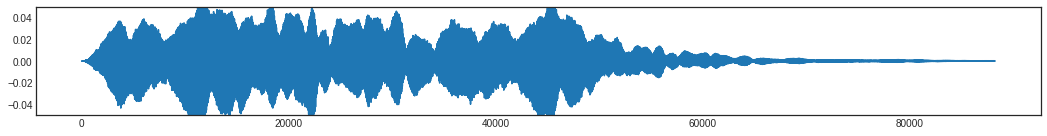

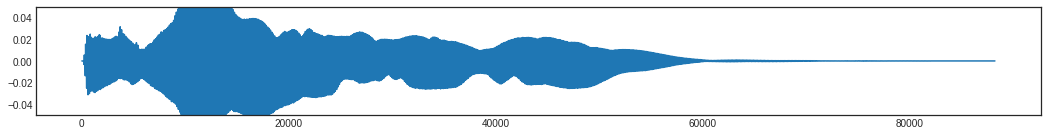

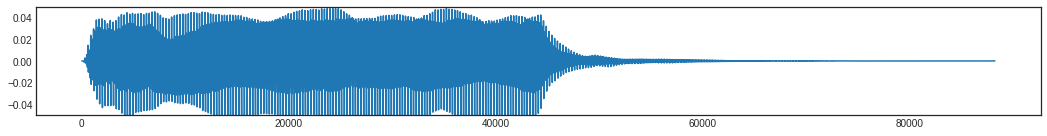

In [ ]:
for idx in range(0, len(audio_np), num_notes):
  plt.figure(figsize=(18,2))
  plt.plot(audio_np[idx])
  plt.ylim((-0.05, 0.05))
  plt.show()

* 음원 샘플 예시

In [ ]:
print(inst_np[0])
ipd.Audio(audio_np[0], rate=sr)

0


In [ ]:
print(inst_np[50])
ipd.Audio(audio_np[50], rate=sr)

1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(audio_np)

MinMaxScaler()

# 머신러닝 (Logistic Regression, Support Vector Machine, Decision Tree)



*   학습 데이터와 실험 데이터를 분리 (train 80%, test 20%)



In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(audio_np, inst_np, test_size = 0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 88200)
(100, 88200)
(400,)
(100,)


## Logistic Regression



* Logistic Regression은 특성상 다중 분류에는 적합하지 않음



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.09


## Support Vector Machine

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.11


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.38


# *Feature: Constant-Q를 이용한 오디오 분류*
---



# 데이터 준비

* wav는 매 순간의 음압을 측정하여 그 수치를 저장한 형태이기 때문에 그 자체로 음악을 분석하기에 적합하지 않음 (음의 높이와 세기를 듣는것이지 순간의 음압을 듣는게 아니기 때문)
* 푸리에 변환과 같은 변환 기법을 이용하여 시간 축의 데이터를 주파수 축의 데이터로 바꿔줌 (데이터를 2차원으로)
* 푸리에 변환 대신 푸리에 변환과 유사한 Constant-Q 변환을 사용
* Constant-Q 변환은 주파수 축이 로그 단위로 변환되고, 각 주파수에 따라 해상도가 다양하게 처리되기 때문에(저주파는 저해상도, 고주파는 고해상도) 음악을 처리하는 데에 푸리에 변환보다 유리
---
* 주파수 대역을 저장할 리스트 `audio-cqt` 선언
* Constant-Q 변환할 때는 변환할 오디오 데이터와 sampling rate 필요
* 해당 데이터에서는 sampling rate가 모두 동일하므로 따로 처리가 필요하지 않음
* 여기서는 Constant-Q 변환을 사용해 오디오 데이터를 주파수 대역으로 변환
---
* 변환에는 앞서 준비한 데이터를 가져와 사용하며, Constant-Q 변환에는 `librosa.cqt` 함수를 사용
* 여기서 `n_bits`는 옥타브 단계 및 개수를, `bits_per_octave`는 한 옥타브가 가지는 단계를 의미
* 라벨에 대해선 원 핫 인코딩을 적용

In [ ]:
audio_cqt = []
for y in audio:
  ret = librosa.cqt(y, sr, hop_length=1024, n_bins=24*7, bins_per_octave=24)
  ret = np.abs(ret)
  audio_cqt.append(ret)

* 앞서 생성한 주파수 대역을 spectrogram으로 시각화
* 악기 간 spectrogram을 비교해보면 차이가 존재함을 알 수 있음

/usr/local/lib/python3.7/dist-packages/librosa/display.py:1336: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  "Frequency axis exceeds Nyquist. "


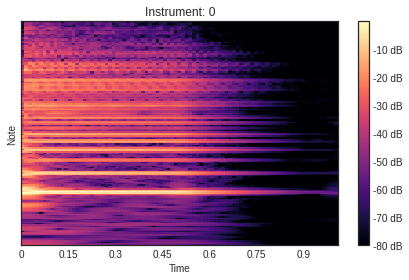

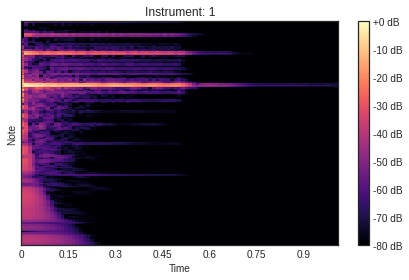

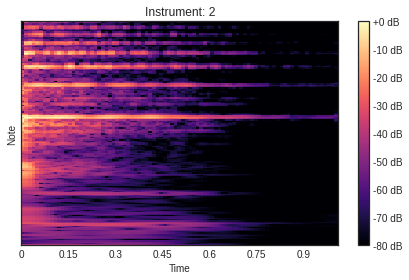

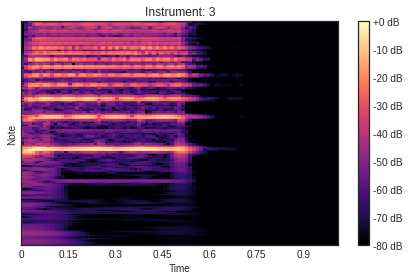

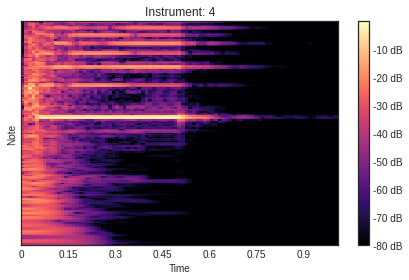

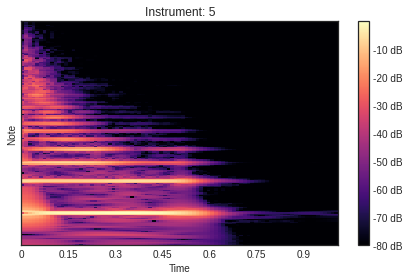

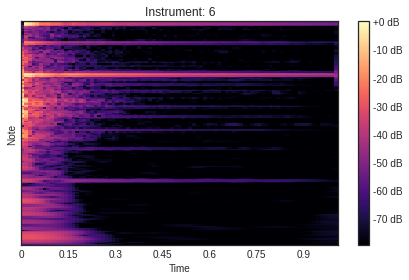

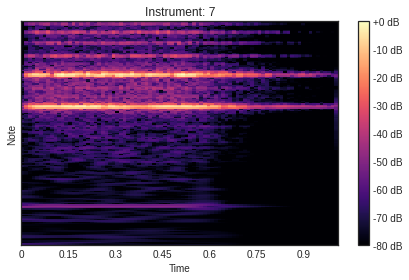

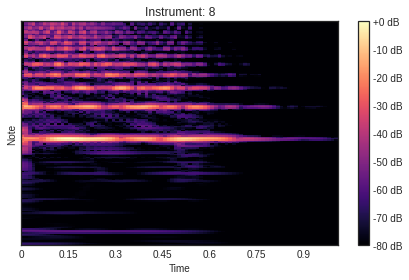

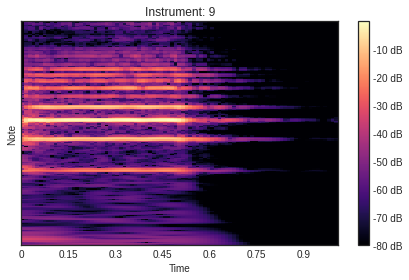

In [ ]:
for i in range(0, len(instruments)*num_notes, num_notes):
  amp_db = librosa.amplitude_to_db(np.abs(audio_cqt[i]), ref=np.max)
  librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='cqt_note')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Instrument: {}'.format(inst[i]))
  plt.tight_layout()
  plt.show()

In [ ]:
cqt_np = np.array(audio_cqt, np.float32)
inst_np = np.array(inst, np.int16)

print(cqt_np.shape, inst_np.shape)

(500, 168, 87) (500,)


분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환 (500개의 sample)

In [ ]:
cqt_np = cqt_np.reshape(500, 168*87)

* 읽어온 데이터의 음량이나 범위가 다를 수 있음
* min-max scaling을 통해 데이터의 범위를 조정함

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(cqt_np)

MinMaxScaler()

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(cqt_np, inst_np, test_size = 0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 14616)
(100, 14616)
(400,)
(100,)


# 머신러닝 (Logistic Regression, Support Vector Machine, Decision Tree)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.22


## Support Vector Machine

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.34


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.58


# 딥러닝 (DNN, CNN)

* 오디오 데이터를 spectrogram으로 가공하여 파장과 세기를 가진 이미지(2차원 배열)로 변환
* 이 spectrogram을 딥러닝 이미지 분류를 통해 각 악기 소리 분류

## DNN 모델 구성

In [ ]:
from tensorflow.keras.utils import to_categorical

cqt_np = np.array(audio_cqt, np.float32)
cqt_np = cqt_np.reshape(500, 168*87)
cqt_array = np.expand_dims(cqt_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(cqt_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 14616, 1)
(100, 14616, 1)
(400, 10)
(100, 10)


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense

def model_build():
  model = Sequential()

  input = Input(shape=(14616, ), name='input')
  output = Dense(512, activation='relu', name='hidden1')(input)
  output = Dense(256, activation='relu', name='hidden2')(output)
  output = Dense(128, activation='relu', name='hidden3')(output)
  output = Dense(10, activation='softmax', name='output')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['acc'])
  
  return model

In [ ]:
model = model_build()
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 14616)]           0         
                                                                 
 hidden1 (Dense)             (None, 512)               7483904   
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 7,649,418
Trainable params: 7,649,418
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_x, train_y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 1s 115ms/step - loss: 2.2860 - acc: 0.1063 - val_loss: 2.0933 - val_acc: 0.2250
Epoch 2/30
3/3 [==============================] - 0s 28ms/step - loss: 1.9265 - acc: 0.5000 - val_loss: 1.9705 - val_acc: 0.2875
Epoch 3/30
3/3 [==============================] - 0s 28ms/step - loss: 1.5987 - acc: 0.5344 - val_loss: 1.8617 - val_acc: 0.2750
Epoch 4/30
3/3 [==============================] - 0s 27ms/step - loss: 1.2810 - acc: 0.6375 - val_loss: 1.7642 - val_acc: 0.3250
Epoch 5/30
3/3 [==============================] - 0s 26ms/step - loss: 1.0364 - acc: 0.6875 - val_loss: 1.8389 - val_acc: 0.3125
Epoch 6/30
3/3 [==============================] - 0s 26ms/step - loss: 0.8195 - acc: 0.7750 - val_loss: 1.9709 - val_acc: 0.3875
Epoch 7/30
3/3 [==============================] - 0s 28ms/step - loss: 0.6567 - acc: 0.8094 - val_loss: 2.0197 - val_acc: 0.3625
Epoch 8/30
3/3 [==============================] - 0s 27ms/step - loss: 0.5259 - acc: 0.8469 - va

In [ ]:
def plot_history(history_dict):
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']
  acc = history_dict['acc']
  val_acc = history_dict['val_acc']

  epochs = range(1, len(loss) + 1)
  fig = plt.figure(figsize=(14, 5))

# figure 1
  ax1 = fig.add_subplot(1,2,1)
  ax1.plot(epochs, loss, 'b--', label='train_loss')
  ax1.plot(epochs, val_loss, 'r:', label='val_loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()
# figure 2
  ax2 = fig.add_subplot(1,2,2)
  ax2.plot(epochs, acc, 'b--', label='train_acc')
  ax2.plot(epochs, val_acc, 'r:', label='val_acc')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Acc')
  ax2.grid()
  ax2.legend()

  plt.show()


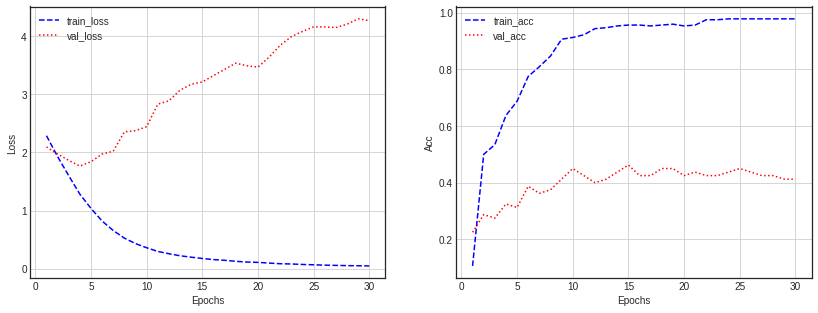

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 5ms/step - loss: 6.2810 - acc: 0.3600


[6.280986785888672, 0.36000001430511475]

## CNN 모델 구성

* spectrogram을 분류할 CNN 모델 구성
* 모델의 구성은 여타 이미지 분류 모델과 다르지 않음
* spectrogram은 1차원 이미지로 간주

In [ ]:
from tensorflow.keras.utils import to_categorical

cqt_np = np.array(audio_cqt, np.float32)
cqt_array = np.expand_dims(cqt_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(cqt_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 168, 87, 1)
(100, 168, 87, 1)
(400, 10)
(100, 10)


In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten

def model_build():
  model = Sequential()

  input = Input(shape=(168, 87, 1))

# Convolution Layer
  output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(input)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)

  output = Conv2D(256, 3, strides=1, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)

  output = Conv2D(512, 3, strides=1, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)

  output = Flatten()(output)
  output = Dense(512, activation='relu')(output)
  output = Dense(256, activation='relu')(output)
  output = Dense(128, activation='relu')(output)

  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['acc'])
   
  return model


In [ ]:
model = model_build()
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 168, 87, 1)]      0         
                                                                 
 conv2d_15 (Conv2D)          (None, 168, 87, 128)      1280      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 84, 44, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 84, 44, 256)       295168    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 42, 22, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 42, 22, 512)       118

In [ ]:
history = model.fit(train_x, train_y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 3s 757ms/step - loss: 2.2128 - acc: 0.1000 - val_loss: 2.1179 - val_acc: 0.2000
Epoch 2/30
3/3 [==============================] - 2s 637ms/step - loss: 1.7928 - acc: 0.3562 - val_loss: 1.7388 - val_acc: 0.3250
Epoch 3/30
3/3 [==============================] - 2s 564ms/step - loss: 1.3989 - acc: 0.4719 - val_loss: 1.5207 - val_acc: 0.4875
Epoch 4/30
3/3 [==============================] - 2s 565ms/step - loss: 0.9606 - acc: 0.6156 - val_loss: 1.5142 - val_acc: 0.5125
Epoch 5/30
3/3 [==============================] - 2s 564ms/step - loss: 0.7194 - acc: 0.7563 - val_loss: 1.4451 - val_acc: 0.5625
Epoch 6/30
3/3 [==============================] - 2s 566ms/step - loss: 0.5542 - acc: 0.7531 - val_loss: 0.8745 - val_acc: 0.7500
Epoch 7/30
3/3 [==============================] - 2s 562ms/step - loss: 0.3419 - acc: 0.8969 - val_loss: 0.7618 - val_acc: 0.7625
Epoch 8/30
3/3 [==============================] - 2s 567ms/step - loss: 0.2217 - acc: 0.93

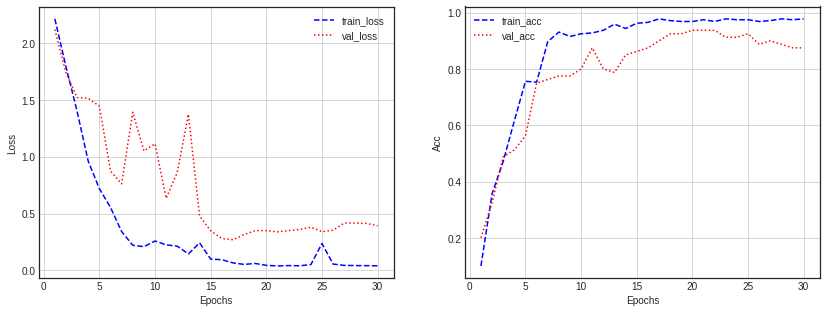

In [ ]:
plot_history(history.history)

* 훈련한 모델에 대한 정확도 평가
* 앞선 일반 분류 방법보다 정확도가 많이 오른것을 확인할 수 있음

In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 60ms/step - loss: 0.2656 - acc: 0.9300


[0.26563793420791626, 0.9300000071525574]

# *Feature: MFCC를 이용한 머신러닝 오디오 분류*

---



# 데이터 준비

* 데이터를 불러오고 MFCC(Mel-frequency cepstral coefficients)를 사용해 melspectrogram으로 변환

In [ ]:
audio_mfcc = []
for y in audio:
  ret = librosa.feature.mfcc(y=y, sr=sr)
  audio_mfcc.append(ret)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9839 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9839 missing from current font.
  font.set_text(s, 0, flags=flags)


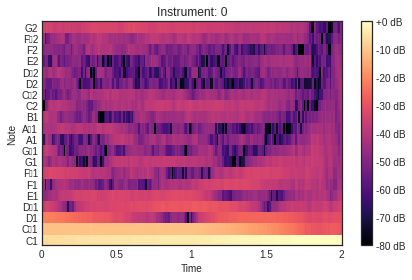

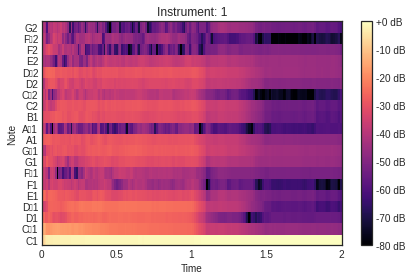

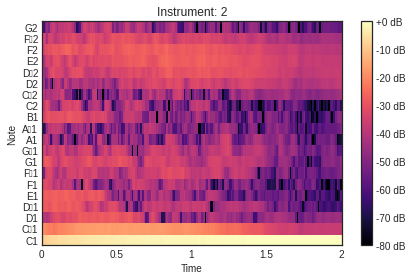

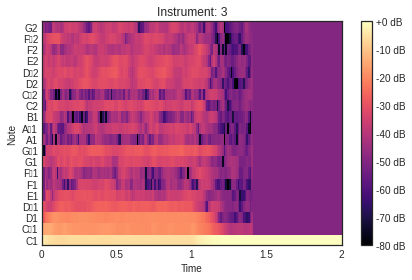

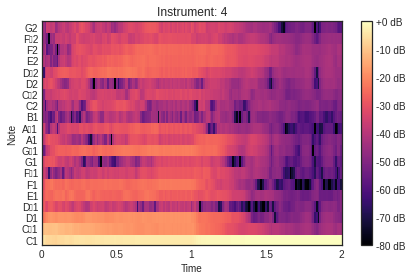

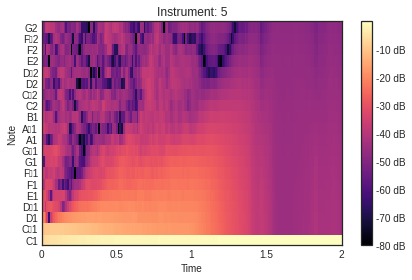

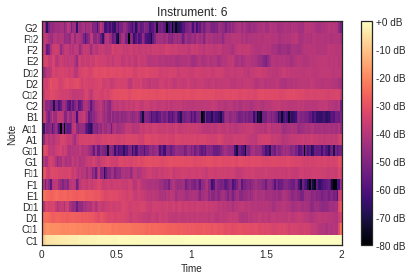

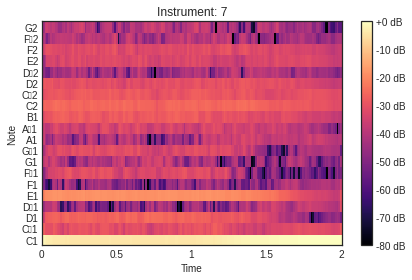

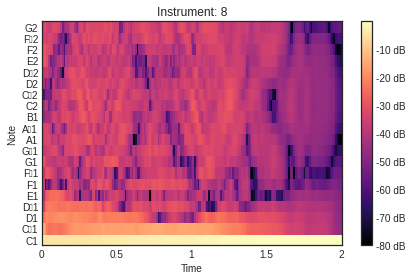

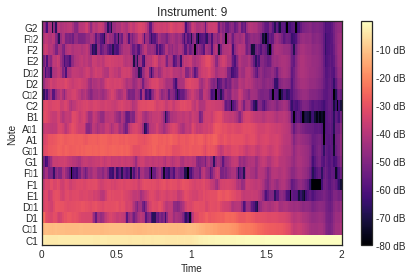

In [ ]:
for i in range(0, len(instruments)*num_notes, num_notes):
  amp_db = librosa.amplitude_to_db(np.abs(audio_mfcc[i]), ref=np.max)
  librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='cqt_note')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Instrument: {}'.format(inst[i]))
  plt.tight_layout()
  plt.show() 


In [ ]:
mfcc_np = np.array(audio_mfcc, np.float32)
inst_np = np.array(inst, np.int16)

print(mfcc_np.shape, inst_np.shape)

(500, 20, 173) (500,)


* 분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환

In [ ]:
mfcc_np = mfcc_np.reshape((500, 20*173))

* 읽어온 데이터는 음량이나 범위가 다를 수 있음
* min-max scaling을 통해 데이터의 범위를 조정함

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(mfcc_np)

MinMaxScaler()

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(mfcc_np, inst_np, test_size=0.2)

print(train_x.shape) 
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 3460)
(100, 3460)
(400,)
(100,)


# 머신러닝 (Logistic Regression, Support Vector Machine, Decision Tree)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.9


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Support Vector Machine

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.96


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.87


# 딥러닝 (DNN, CNN)

## DNN 모델 구성

In [ ]:
from tensorflow.keras.utils import to_categorical

mfcc_np = np.array(audio_mfcc, np.float32)
mfcc_np = mfcc_np.reshape(500, 20 * 173)
mfcc_array = np.expand_dims(mfcc_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(mfcc_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 3460, 1)
(100, 3460, 1)
(400, 10)
(100, 10)


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense

def model_build():
  model = Sequential()

  input = Input(shape=(3460, ), name='input')
  output = Dense(512, activation='relu', name='hidden1')(input)
  output = Dense(256, activation='relu', name='hidden2')(output)
  output = Dense(128, activation='relu', name='hidden3')(output)
  output = Dense(10, activation='softmax', name='output')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['acc'])
  
  return model

In [ ]:
model = model_build()
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3460)]            0         
                                                                 
 hidden1 (Dense)             (None, 512)               1772032   
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,937,546
Trainable params: 1,937,546
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_x, train_y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 1s 103ms/step - loss: 184.4747 - acc: 0.1031 - val_loss: 329.2393 - val_acc: 0.1625
Epoch 2/30
3/3 [==============================] - 0s 18ms/step - loss: 229.9421 - acc: 0.1813 - val_loss: 205.4373 - val_acc: 0.1750
Epoch 3/30
3/3 [==============================] - 0s 18ms/step - loss: 197.7567 - acc: 0.1844 - val_loss: 146.6611 - val_acc: 0.1625
Epoch 4/30
3/3 [==============================] - 0s 19ms/step - loss: 131.0320 - acc: 0.2062 - val_loss: 125.0484 - val_acc: 0.2000
Epoch 5/30
3/3 [==============================] - 0s 18ms/step - loss: 92.9967 - acc: 0.3125 - val_loss: 68.0137 - val_acc: 0.2000
Epoch 6/30
3/3 [==============================] - 0s 19ms/step - loss: 43.0336 - acc: 0.2562 - val_loss: 53.7541 - val_acc: 0.3250
Epoch 7/30
3/3 [==============================] - 0s 19ms/step - loss: 32.2152 - acc: 0.3906 - val_loss: 46.8411 - val_acc: 0.3375
Epoch 8/30
3/3 [==============================] - 0s 19ms/step - loss: 30.

In [ ]:
def plot_history(history_dict):
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']
  acc = history_dict['acc']
  val_acc = history_dict['val_acc']

  epochs = range(1, len(loss) + 1)
  fig = plt.figure(figsize=(14, 5))

# figure 1
  ax1 = fig.add_subplot(1,2,1)
  ax1.plot(epochs, loss, 'b--', label='train_loss')
  ax1.plot(epochs, val_loss, 'r:', label='val_loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()
# figure 2
  ax2 = fig.add_subplot(1,2,2)
  ax2.plot(epochs, acc, 'b--', label='train_acc')
  ax2.plot(epochs, val_acc, 'r:', label='val_acc')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Acc')
  ax2.grid()
  ax2.legend()

  plt.show()


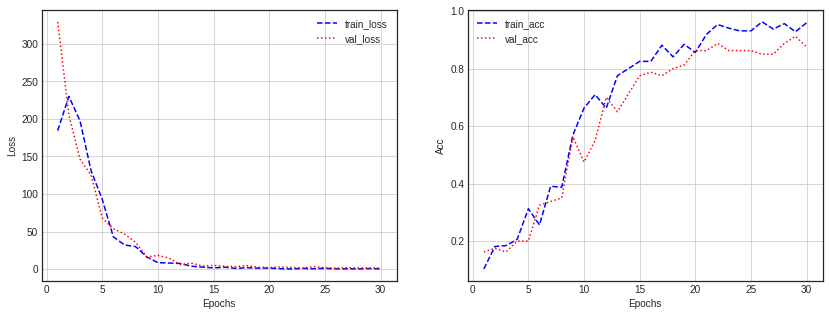

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 4ms/step - loss: 0.9030 - acc: 0.9000


[0.9030032157897949, 0.8999999761581421]

## CNN 모델 구성

* spectrogram을 분류할 CNN 모델 구성
* 모델의 구성은 여타 이미지 분류 모델과 다르지 않음
* spectrogram은 1차원 이미지로 간주

In [ ]:
from tensorflow.keras.utils import to_categorical

mfcc_np = np.array(audio_mfcc, np.float32)
mfcc_array = np.expand_dims(mfcc_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(mfcc_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 20, 173, 1)
(100, 20, 173, 1)
(400, 10)
(100, 10)


In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten

def model_build():
  model = Sequential()

  input = Input(shape=(20, 173, 1))

# Convolution Layer
  output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(input)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)

  output = Conv2D(256, 3, strides=1, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)

  output = Conv2D(512, 3, strides=1, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)

  output = Flatten()(output)
  output = Dense(512, activation='relu')(output)
  output = Dense(256, activation='relu')(output)
  output = Dense(128, activation='relu')(output)

  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['acc'])
   
  return model


In [ ]:
model = model_build()
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 20, 173, 1)]      0         
                                                                 
 conv2d_18 (Conv2D)          (None, 20, 173, 128)      1280      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 10, 87, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 87, 256)       295168    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 44, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 5, 44, 512)        118

In [ ]:
history = model.fit(train_x, train_y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 2s 304ms/step - loss: 106.2275 - acc: 0.1187 - val_loss: 33.5620 - val_acc: 0.0250
Epoch 2/30
3/3 [==============================] - 1s 171ms/step - loss: 17.0601 - acc: 0.1187 - val_loss: 2.8224 - val_acc: 0.0000e+00
Epoch 3/30
3/3 [==============================] - 1s 173ms/step - loss: 2.4882 - acc: 0.1187 - val_loss: 2.2846 - val_acc: 0.1000
Epoch 4/30
3/3 [==============================] - 1s 168ms/step - loss: 2.2482 - acc: 0.1437 - val_loss: 2.2440 - val_acc: 0.2125
Epoch 5/30
3/3 [==============================] - 1s 173ms/step - loss: 2.1187 - acc: 0.2406 - val_loss: 1.9347 - val_acc: 0.3125
Epoch 6/30
3/3 [==============================] - 1s 169ms/step - loss: 1.8995 - acc: 0.3063 - val_loss: 1.5742 - val_acc: 0.5125
Epoch 7/30
3/3 [==============================] - 1s 167ms/step - loss: 1.6193 - acc: 0.4375 - val_loss: 1.3604 - val_acc: 0.6250
Epoch 8/30
3/3 [==============================] - 1s 169ms/step - loss: 1.2455 - a

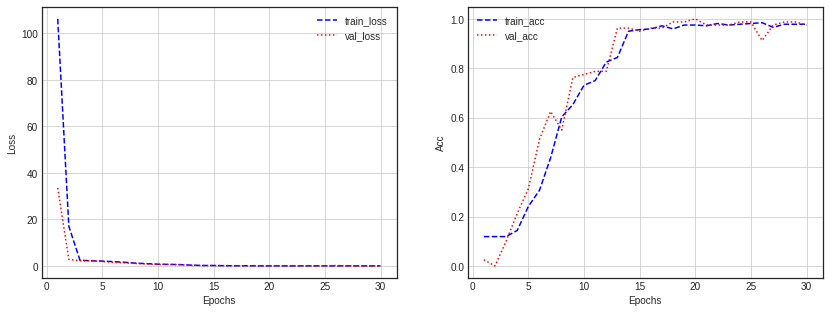

In [ ]:
plot_history(history.history)

* 훈련한 모델에 대한 정확도 평가
* 앞선 일반 분류 방법보다 정확도가 많이 오른것을 확인할 수 있음

In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 18ms/step - loss: 0.1671 - acc: 0.9400


[0.16708225011825562, 0.9399999976158142]

# 결과 정리
* 알고리즘 자체도 중요하지만, 어떠한 특징값을 사용하는지도 중요하다.
---

|분류|non-feature|Constant-Q|MFCC|
|:--:|:--:|:--:|:--:|
|LR|0.09|0.22|0.9|
|SVM|0.11|0.34|0.96|
|DC|0.38|0.58|0.87|
|DNN|-|0.36|0.9|
|CNN|-|0.93|0.94|

  * 머신러닝: LR, SVM, DC, 딥러닝: DNN, CNN

---

  


